# Operaciones aritméticas

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import urllib.request

In [7]:
def process_image(image_path):
    req = urllib.request.urlopen(image_path)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    img = cv2.imdecode(arr, -1)
    return img

In [8]:
spot = process_image('https://raw.githubusercontent.com/pukinidev/TalleresImagenes/refs/heads/main/Taller1/images/spot.png')
rondelle = process_image('https://raw.githubusercontent.com/pukinidev/TalleresImagenes/refs/heads/main/Taller1/images/rondelle.png')

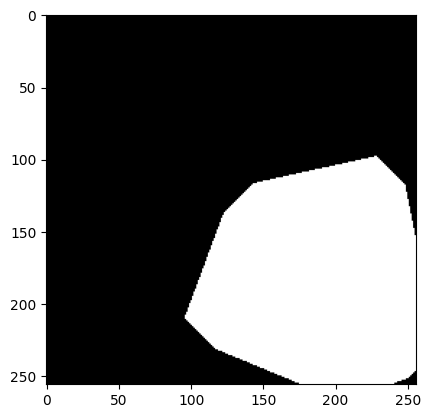

In [9]:
plt.imshow(spot, cmap='gray')

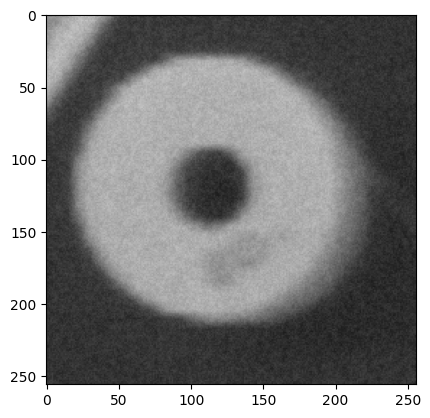

In [20]:
plt.imshow(rondelle, cmap='gray')

# 16 Bits Images

In [10]:
def process_image_16_bits(image_path):
    req = urllib.request.urlopen(image_path)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    img = cv2.imdecode(arr, cv2.IMREAD_ANYDEPTH)
    return img

In [11]:
spot_16_bits = process_image_16_bits('https://raw.githubusercontent.com/pukinidev/TalleresImagenes/refs/heads/main/Taller1/images/spot.png')
rondelle_16_bits = process_image_16_bits('https://raw.githubusercontent.com/pukinidev/TalleresImagenes/refs/heads/main/Taller1/images/rondelle.png')

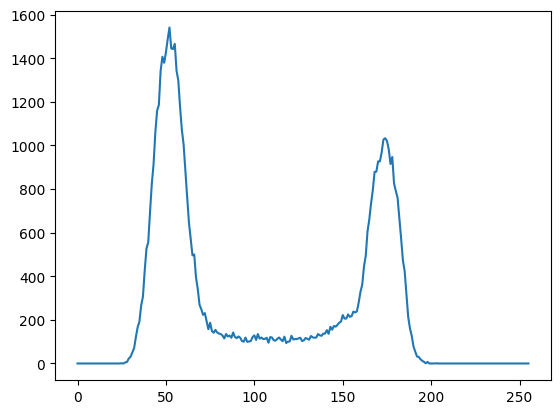

In [15]:
hist = cv2.calcHist([rondelle_16_bits], [0], None, [256], [0,256])
plt.plot(hist)
plt.show()

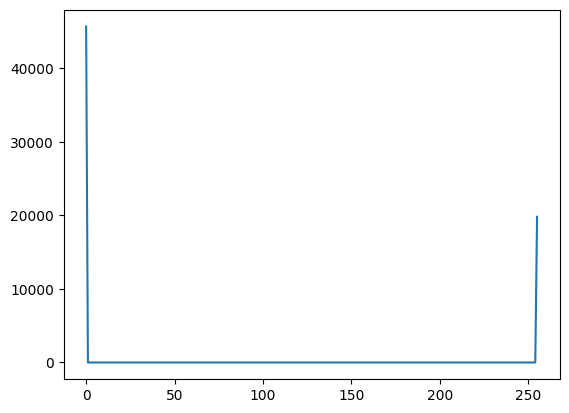

In [14]:
hist = cv2.calcHist([spot_16_bits], [0], None, [256], [0,256])
plt.plot(hist)
plt.show()

# Explicación

# Operacion  de adición 

In [16]:
add_image =  cv2.add(rondelle, spot)

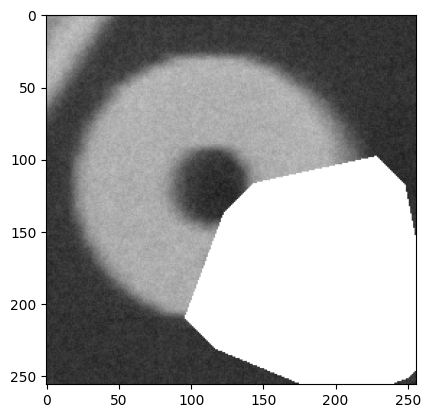

In [17]:
plt.imshow(add_image, cmap='gray')

## Histograma

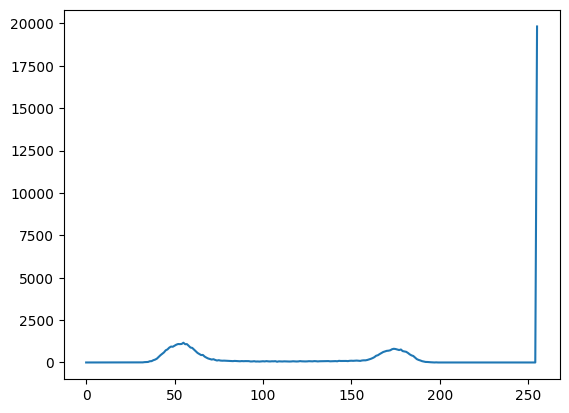

In [17]:
hist = cv2.calcHist([add_image], [0], None, [256], [0,256])
plt.plot(hist)
plt.show()

## Explicación

# Operacion  de sustracción

In [18]:
sub_image =  cv2.subtract(rondelle, spot)

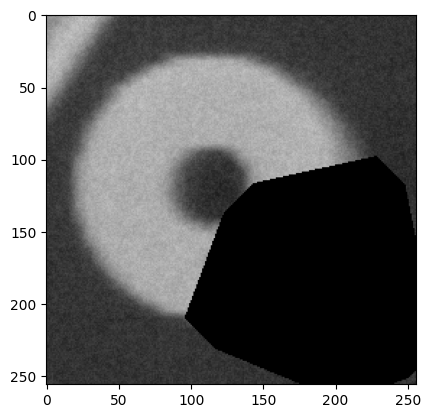

In [19]:
plt.imshow(sub_image)

In [20]:
sub_image =  cv2.subtract(spot, rondelle)

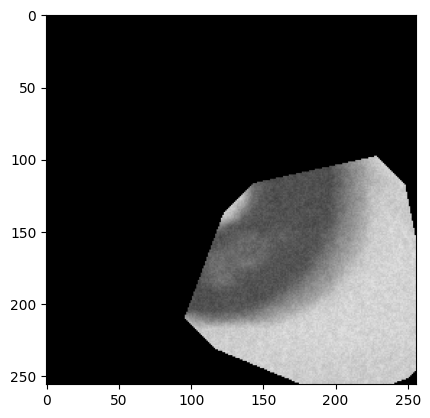

In [21]:
plt.imshow(sub_image)

¿Cómo afecta al resultado la inversión de los operandos?

# Explicación

Conociendo únicamente los histogramas de las imágenes operandos (y no las imágenes mismas), ¿es posible prever el histograma de la imagen que se obtendrá con una operación aritmética sobre estas imágenes operandos? ¿Por qué?